<a href="https://colab.research.google.com/github/chandbud5/Face_Mask_detection/blob/master/Face_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Getting Dataset

In [0]:
! git clone https://github.com/chandbud5/Face_Mask_detection

Cloning into 'Face_Mask_detection'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 1643 (delta 3), reused 0 (delta 0), pack-reused 1567
Receiving objects: 100% (1643/1643), 74.76 MiB | 27.61 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Using image generator for augmentation

In [0]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3,
                                                            height_shift_range=0.3,
                                                            zoom_range=0.3,
                                                            rotation_range=0.5,
                                                            shear_range=0.3,
                                                            fill_mode="nearest",
                                                            horizontal_flip=True)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3,
                                                            height_shift_range=0.3,
                                                            zoom_range=0.3,
                                                            rotation_range=0.5,
                                                            shear_range=0.3,
                                                            fill_mode="nearest",
                                                            horizontal_flip=True)

In [0]:
train_data = train_gen.flow_from_directory("/content/Face_Mask_detection/train",
                                           target_size=(180, 180),
                                           batch_size=125,
                                           class_mode="binary")

test_data = test_gen.flow_from_directory("/content/Face_Mask_detection/test",
                                        target_size=(180, 180),
                                        batch_size=25,
                                        class_mode="binary")

Found 1368 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [0]:
train_mask = "/content/Face_Mask_detection/train/with_mask/"
train_wmask = "/content/Face_Mask_detection/train/without_mask/"
test_mask = "/content/Face_Mask_detection/test/with_mask/"
test_wmask = "/content/Face_Mask_detection/test/without_mask/"

wmask_fnames = os.listdir(train_wmask)
mask_fnames = os.listdir(train_mask)

## Visualizing dataset

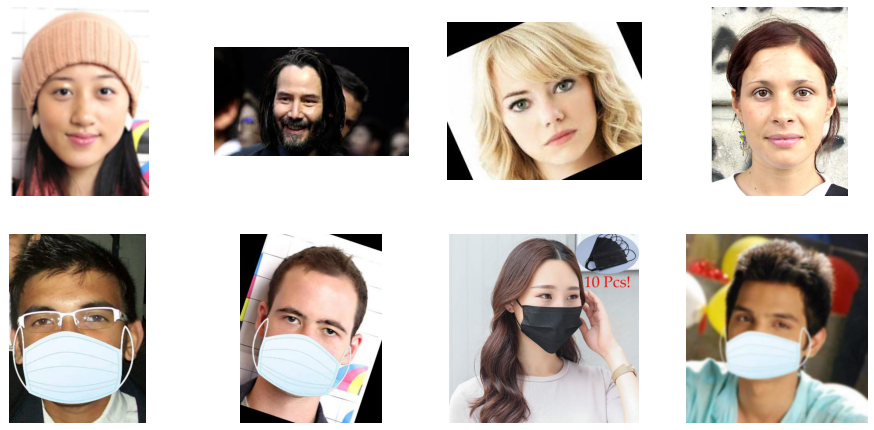

In [0]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=201


next_wmask_pix = [os.path.join(train_wmask, fname) 
                for fname in wmask_fnames[ pic_index-4:pic_index]
               ]

next_mask_pix = [os.path.join(train_mask, fname) 
                for fname in mask_fnames[ pic_index-4:pic_index] 
               ]

for i, img_path in enumerate(next_wmask_pix+next_mask_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building Model

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180,180, 3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [0]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(train_data, epochs=30, verbose=1, validation_data=test_data)
model.save("mask_classifier.h5")

Epoch 1/30
11/11 [==============================] - 18s 2s/step - loss: 66.2505 - accuracy: 0.5037 - val_loss: 0.7734 - val_accuracy: 0.4897
Epoch 2/30
11/11 [==============================] - 18s 2s/step - loss: 0.7291 - accuracy: 0.5300 - val_loss: 0.6977 - val_accuracy: 0.5309
Epoch 3/30
11/11 [==============================] - 18s 2s/step - loss: 0.6958 - accuracy: 0.5278 - val_loss: 0.6816 - val_accuracy: 0.5103
Epoch 4/30
11/11 [==============================] - 18s 2s/step - loss: 0.6811 - accuracy: 0.5746 - val_loss: 0.6762 - val_accuracy: 0.5258
Epoch 5/30
11/11 [==============================] - 18s 2s/step - loss: 0.6705 - accuracy: 0.5629 - val_loss: 0.6559 - val_accuracy: 0.6495
Epoch 6/30
11/11 [==============================] - 18s 2s/step - loss: 0.6324 - accuracy: 0.6579 - val_loss: 0.5914 - val_accuracy: 0.6907
Epoch 7/30
11/11 [==============================] - 18s 2s/step - loss: 0.6400 - accuracy: 0.6645 - val_loss: 0.5437 - val_accuracy: 0.7268
Epoch 8/30
11/11 [=

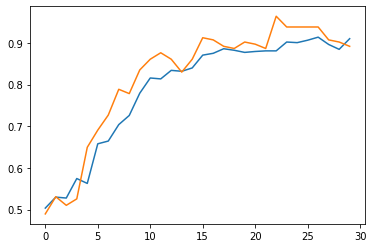

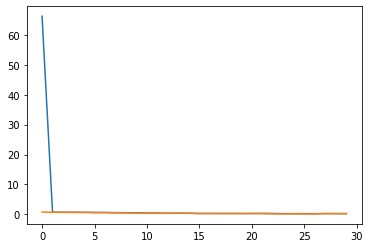

In [0]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']
epochs = range(len(train_acc))
plt.plot(epochs, train_acc)
plt.plot(epochs, test_acc)
plt.show()

plt.plot(epochs, train_loss)
plt.plot(epochs, test_loss)
plt.show()

# Testing our model

## **IF PREDICTED VALUE IS LESS THAN 0.5 THEN IMAGE IS WITH MASK ELSE IT IS WITHOUT MASK**

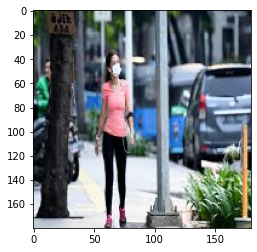

[[0.14629853]]


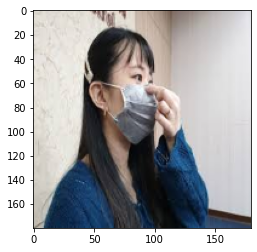

[[0.29171425]]


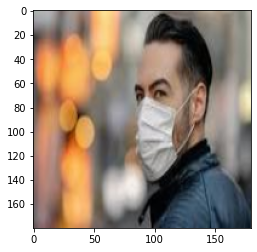

[[0.35086653]]


In [0]:
import cv2

c = cv2.imread("/content/images2.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction)

c = cv2.imread("/content/images3.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction)

c = cv2.imread("/content/download4.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction)

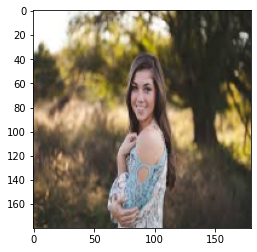

[[0.97809815]]


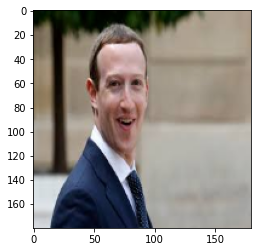

[[0.5680266]]


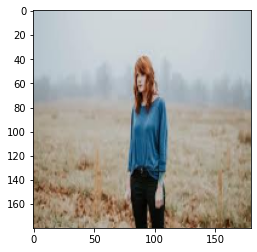

[[0.7196008]]


In [0]:
c = cv2.imread("/content/download3.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction)

c = cv2.imread("/content/images1.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction)

c = cv2.imread("/content/images.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction)
